In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_squared_error

In [26]:
df = pd.read_csv('Salary.csv')

In [27]:
df

,Январь;Февраль;Март;Апрель;Май;Июнь;Июль;Август;Сентябрь;Октябрь;Ноябрь;Декабрь
0,0.00000266;0.00000268;0.00000295;0.00000358;0....
1,0.00001256;0.00001507;0.00002117;0.00002445;0....
2,0.00012939;0.00016252;0.00018898;0.000236;0.00...
3,0.00188469;0.00204379;0.00238525;0.00396959;0....
4,0.0339666;0.0387739;0.0653853;0.0692137;0.0732...
5,0.0950903;0.1015329;0.1066554;0.1062414;0.1131...
6,0.1526205;0.1639575;0.1732454;0.1898682;0.2003...
7,0.3024216;0.338995;0.3698217;0.3669287;0.38549...
8,0.89785;0.9953934;1.1682205;1.2849557;1.758057...
9,3.5271899;3.9971899;4.5045549;5.004716;5.50538...


In [21]:
monthly_salaries = []
for row in range(len(df)):
    monthly_salaries.extend(list(df.iloc[row]))

In [28]:
monthly_salaries

['0.00000266;0.00000268;0.00000295;0.00000358;0.00000409;0.00000455;0.00000498;0.00000509;0.00000542;0.0000064;0.00000711;0.00001109',
 '0.00001256;0.00001507;0.00002117;0.00002445;0.00003318;0.0000407;0.00004171;0.00004509;0.00005492;0.00006563;0.00008455;0.00012372',
 '0.00012939;0.00016252;0.00018898;0.000236;0.00026623;0.00037314;0.00041869;0.00056363;0.00064305;0.00094959;0.00121822;0.0016248',
 '0.00188469;0.00204379;0.00238525;0.00396959;0.00437853;0.00531621;0.00815459;0.00869723;0.00905281;0.00958893;0.0147578;0.0208922',
 '0.0339666;0.0387739;0.0653853;0.0692137;0.0732374;0.0813069;0.0830818;0.087544;0.0880403;0.0903916;0.0876825;0.1013731',
 '0.0950903;0.1015329;0.1066554;0.1062414;0.1131545;0.1187134;0.1235785;0.1260887;0.1288537;0.13562;0.1298258;0.1592893',
 '0.1526205;0.1639575;0.1732454;0.1898682;0.2003435;0.2187892;0.2299311;0.236109;0.2664133;0.2748347;0.2743509;0.3275952',
 '0.3024216;0.338995;0.3698217;0.3669287;0.385494;0.417679;0.4348177;0.444896;0.4663585;0.57311

In [29]:
float_values = []

In [30]:
for row in monthly_salaries:
    row_values = [float(val) for val in row.split(';')]
    float_values.extend(row_values)

In [31]:
float_values

[2.66e-06,
 2.68e-06,
 2.95e-06,
 3.58e-06,
 4.09e-06,
 4.55e-06,
 4.98e-06,
 5.09e-06,
 5.42e-06,
 6.4e-06,
 7.11e-06,
 1.109e-05,
 1.256e-05,
 1.507e-05,
 2.117e-05,
 2.445e-05,
 3.318e-05,
 4.07e-05,
 4.171e-05,
 4.509e-05,
 5.492e-05,
 6.563e-05,
 8.455e-05,
 0.00012372,
 0.00012939,
 0.00016252,
 0.00018898,
 0.000236,
 0.00026623,
 0.00037314,
 0.00041869,
 0.00056363,
 0.00064305,
 0.00094959,
 0.00121822,
 0.0016248,
 0.00188469,
 0.00204379,
 0.00238525,
 0.00396959,
 0.00437853,
 0.00531621,
 0.00815459,
 0.00869723,
 0.00905281,
 0.00958893,
 0.0147578,
 0.0208922,
 0.0339666,
 0.0387739,
 0.0653853,
 0.0692137,
 0.0732374,
 0.0813069,
 0.0830818,
 0.087544,
 0.0880403,
 0.0903916,
 0.0876825,
 0.1013731,
 0.0950903,
 0.1015329,
 0.1066554,
 0.1062414,
 0.1131545,
 0.1187134,
 0.1235785,
 0.1260887,
 0.1288537,
 0.13562,
 0.1298258,
 0.1592893,
 0.1526205,
 0.1639575,
 0.1732454,
 0.1898682,
 0.2003435,
 0.2187892,
 0.2299311,
 0.236109,
 0.2664133,
 0.2748347,
 0.2743509,
 

In [32]:
log_monthly_salaries = np.log(float_values)

In [33]:
log_monthly_salaries

array([-1.28371844e+01, -1.28296938e+01, -1.27337054e+01, -1.25401478e+01,
       -1.24069656e+01, -1.23003833e+01, -1.22100807e+01, -1.21882327e+01,
       -1.21254147e+01, -1.19592126e+01, -1.18540083e+01, -1.14094668e+01,
       -1.12849934e+01, -1.11028045e+01, -1.07629255e+01, -1.06188803e+01,
       -1.03135633e+01, -1.01092825e+01, -1.00847696e+01, -1.00068501e+01,
       -9.80963298e+00, -9.63147765e+00, -9.37816748e+00, -8.99748961e+00,
       -8.95267946e+00, -8.72470949e+00, -8.57386937e+00, -8.35167875e+00,
       -8.23114996e+00, -7.89355687e+00, -7.77837977e+00, -7.48111255e+00,
       -7.34928808e+00, -6.95948025e+00, -6.71036450e+00, -6.42237055e+00,
       -6.27399193e+00, -6.19294935e+00, -6.03845134e+00, -5.52909246e+00,
       -5.43104223e+00, -5.23699464e+00, -4.80917432e+00, -4.74475069e+00,
       -4.70468007e+00, -4.64714597e+00, -4.21598352e+00, -3.86837940e+00,
       -3.38237759e+00, -3.25000794e+00, -2.72745782e+00, -2.67055646e+00,
       -2.61404906e+00, -

In [34]:
monthly_dated_salaries = pd.Series(log_monthly_salaries,
                                   index=pd.date_range(start='1/1/1991', periods=len(log_monthly_salaries),
                                                       freq='M'))

In [35]:
monthly_dated_salaries

1991-01-31   -12.837184
1991-02-28   -12.829694
1991-03-31   -12.733705
1991-04-30   -12.540148
1991-05-31   -12.406966
                ...    
2026-08-31     8.176167
2026-09-30     8.176307
2026-10-31     8.207102
2026-11-30     8.236765
2026-12-31     8.236765
Freq: M, Length: 432, dtype: float64

In [36]:
train = monthly_dated_salaries[:350] # первые 350 записей для тренировки
test = monthly_dated_salaries[350:]  # остальные для теста

In [37]:
fitted_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()

обучаем модель методом экспоненциального сглаживания. Учитываем тренд и сезонность, количество сезонов = 12 (по количеству месяцев). 

In [40]:
test_predictions = fitted_model.forecast(len(test))

с помощью полученной модели делаем прогноз

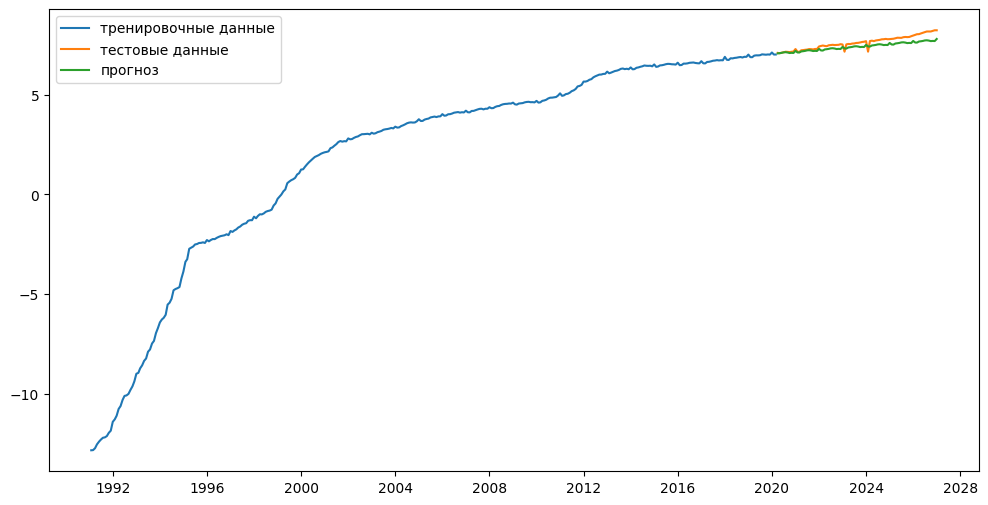

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='тренировочные данные')
plt.plot(test.index, test, label='тестовые данные')
plt.plot(test.index, test_predictions, label='прогноз')
plt.legend()
plt.show()

в будущем тестовые и прогнозные результаты немного расходятся. Это можно объяснить не самым высоким коэффициентом детерминации, о котором ниже

In [50]:
residuals = train - fitted_model.fittedvalues

In [51]:
residuals

1991-01-31   -0.000217
1991-02-28   -0.082456
1991-03-31   -0.038554
1991-04-30    0.110366
1991-05-31    0.023501
                ...   
2019-10-31   -0.002553
2019-11-30   -0.008246
2019-12-31   -0.002797
2020-01-31   -0.028986
2020-02-29    0.008224
Freq: M, Length: 350, dtype: float64

In [52]:
sum(residuals)

-0.4850479312778595

сумма остатков близка к нулю, но всё же не равна ему. а кто из нас идеален?... 

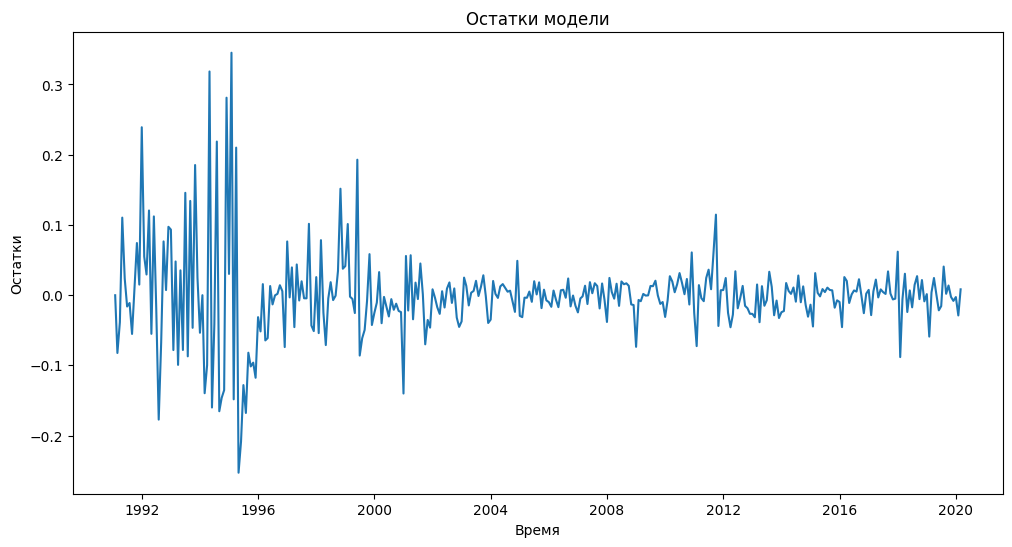

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Остатки модели')
plt.xlabel('Время')
plt.ylabel('Остатки')
plt.show()

In [54]:
mse = mean_squared_error(test, test_predictions, squared=False)

In [55]:
mse

0.24729810699699079

MSE равен 24.73%, это означает, что среднеквадратичная ошибка составляет 24.73 процента от дисперсии фактических значений в тестовом наборе данных. тоже не идеально, но в целом неплохо, я считаю

In [56]:
r2 = sklearn.metrics.r2_score(test, test_predictions)

In [57]:
r2

0.42619242556922654

коэффициент детерминации равен 0.4262, что говорит о средней корреляции параметров времени года и зарплаты белорусов. Значение коэффициента не самое высокое, могло быть и выше, но мы не жалуемся